
<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

Informática II

 </center></font></h1>
<h2><font color='0B5345'> <center>
Parcial II: Computación numérica en python</center></font></h2>
<font  face="Courier New" size="3">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>




Nombre: ALMA DE DIOS OLEA BARBOSA 

Cédula: 1067402037


Antes de iniciar leer cuidadosamente cada enunciado antes de responder y asegurarse de comprender completamente lo que se está solicitando. 

¡Buena suerte!

1. (50%) La electromiografía (EMG) es una técnica ampliamente utilizada en medicina y fisiología para estudiar la actividad eléctrica de los músculos. Esta actividad, conocida como electromiograma (EMG), se registra mediante electrodos colocados sobre la piel o dentro del músculo, y proporciona información valiosa sobre el funcionamiento del sistema neuromuscular.

Instrucciones:

Utilizando programación orientada a objetos, cargue dos archivos de señales de EMG que contenga datos de varios electrodos (canales).

- Cree un método que muestre la información de la señal, que describa la forma de la señal y sus dimensiones (ejemplo: número de puntos de tiempo y el número de canales)

- Defina un método que sea capaz de graficar cada par de canales de EMG en un subplot con un tamaño adecuado. El número de canales es par, por lo tanto debe organizar los subplots en una matriz de dimensiones (numerodecanales/2, numerodecanales/2). Cada canal debe tener un color distinto en el gráfico.

- Los gráficos deben tener títulos, labels, cuadrícula, nombres en los ejes y cambios en el grosor de la línea.
- Debe permitir al usuario ingresar los límites del eje x a graficar.
- En este caso el gráfico es datos vs tiempo

- Defina un método que identifique y muestre la información del valor máximo de amplitud de la señal por cada canal y archivo.

- Cree un método adicional que grafique una señal que represente el promedio de todos los canales de un archivo. Esta señal promedio debe tener un estilo de línea diferente y estar en un gráfico separado.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
import scipy.io as sio

In [31]:
#SOLUCION PUNTO 1

class AnalisisEMG:
    def __init__(self):
        self.data=[]
        self.colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'gray', 'yellow', 'pink']
        self.data = None
        self.time = None
        self.num_electrodos = 0

    def cargar_datos(self, archivo1):
        ekg = sio.loadmat(archivo1)
        self.data = ekg[list(ekg.keys())[-1]]
        self.time = ekg[list(ekg.keys())[-2]][0]
        print("Datos cargados exitosamente.")

    def mostrar_informacion(self):
        self.num_electrodos = self.data.shape[0]
        print (f"Numero de electrodos o canales: {self.num_electrodos}")
        print(f"Numero de puntos por tiempo: {self.data.shape[1]}")

    def graficar_par(self):
        fig, axs = plt.subplots(int(self.num_electrodos / 2), 2, figsize=(14, 14), sharex=True)
        axs= axs.flatten()
        
        for i in range(self.num_electrodos):
            ax = axs[i]
            ax.plot(self.time, self.data[i,:], color = self.colores[i], label=f'electrodo {i + 1}' )
            ax.set_title(f'Señal electrodo {i + 1}')
            ax.set_xlabel("Tiempo")
            ax.set_ylabel("Amplitud")
            ax.legend()
            ax.grid(True)
        
    def maxima_amplitud(self):
        for i in range(self.num_electrodos):
            print(f"Valor máximo de amplitud en Canal {i+1}: {np.max(abs(self.data[i,:]))}")
    
    def promedio_canales(self):
        promedio_canal = np.mean(self.data, axis=0)
        plt.figure(figsize=(10, 3))
        plt.plot(self.time, promedio_canal, label="Señal Promedio de todos los canales del archivo", color="red", linestyle="dotted", linewidth=3)
        plt.title("Señal Promedio de Todos los Canales")
        plt.xlabel("Tiempo")
        plt.ylabel("Amplitud Promedio")
        plt.grid(True)
        plt.legend()
        plt.show()

Datos cargados exitosamente.
Numero de electrodos o canales: 8
Numero de puntos por tiempo: 63196
Valor máximo de amplitud en Canal 1: 0.00127
Valor máximo de amplitud en Canal 2: 0.00127
Valor máximo de amplitud en Canal 3: 0.00127
Valor máximo de amplitud en Canal 4: 0.00127
Valor máximo de amplitud en Canal 5: 0.00128
Valor máximo de amplitud en Canal 6: 0.00127
Valor máximo de amplitud en Canal 7: 0.00127
Valor máximo de amplitud en Canal 8: 0.00127


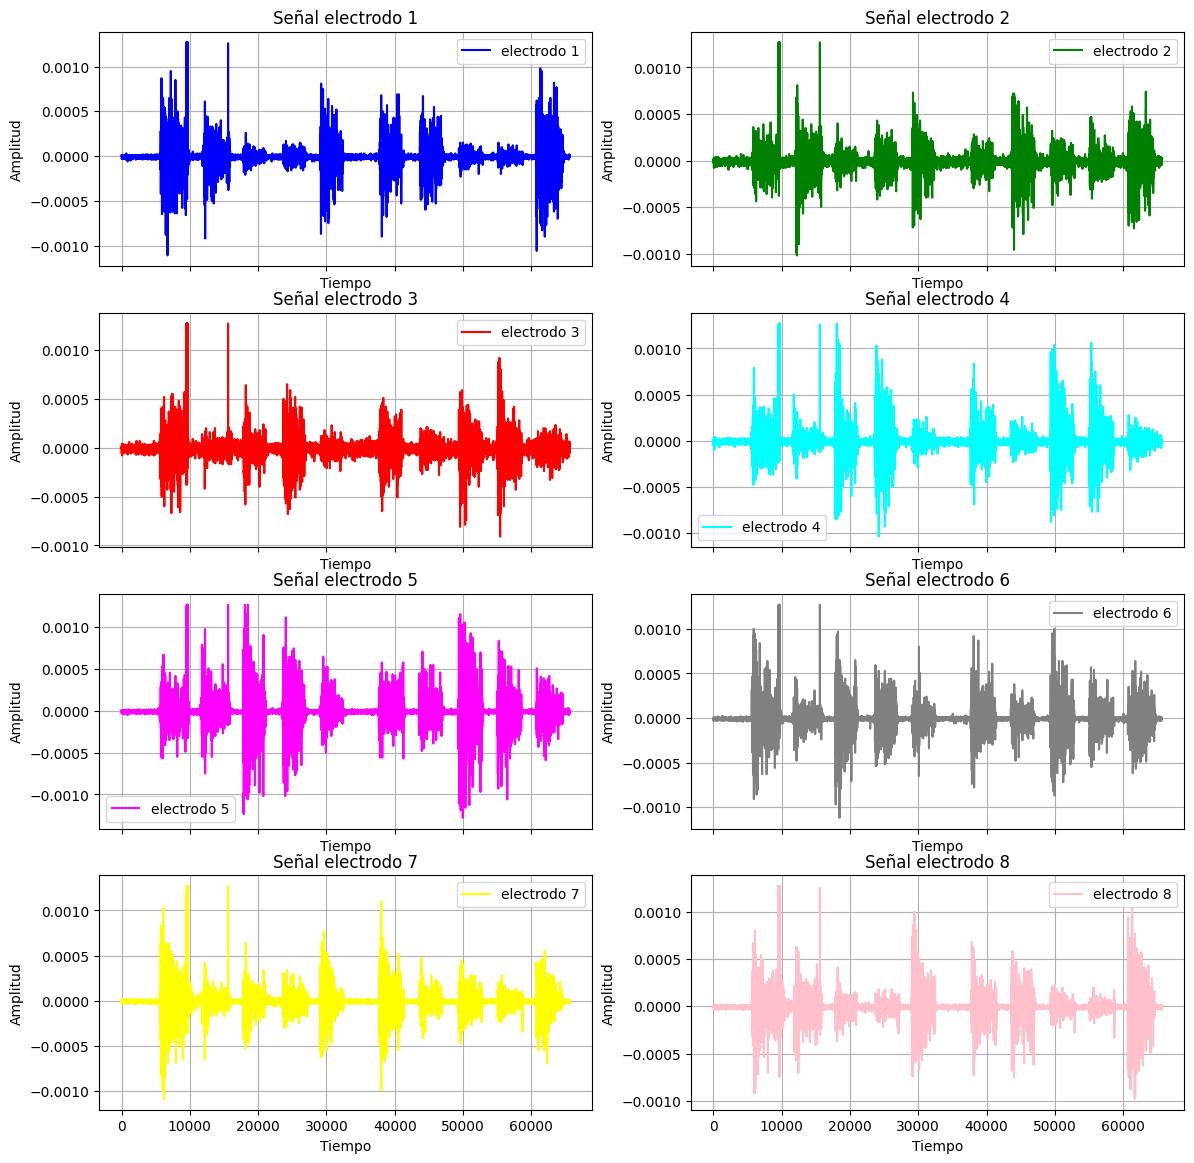

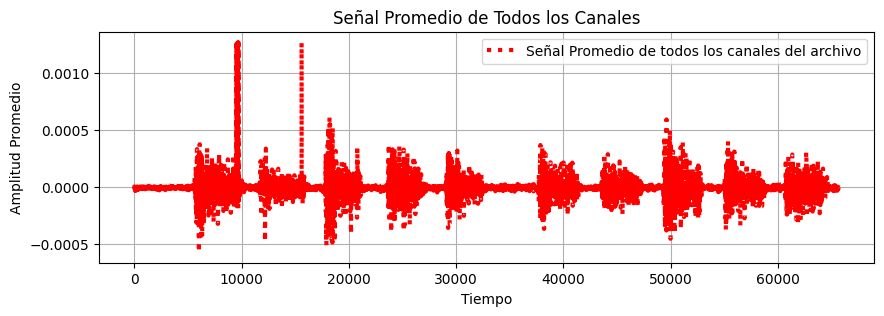

In [32]:
analisis = AnalisisEMG()
analisis.cargar_datos('archivo1.mat')
analisis.mostrar_informacion()
analisis.graficar_par()
analisis.maxima_amplitud()
analisis.promedio_canales()

Datos cargados exitosamente.
Numero de electrodos o canales: 8
Numero de puntos por tiempo: 57974
Valor máximo de amplitud en Canal 1: 0.00116
Valor máximo de amplitud en Canal 2: 0.00127
Valor máximo de amplitud en Canal 3: 0.00106
Valor máximo de amplitud en Canal 4: 0.00119
Valor máximo de amplitud en Canal 5: 0.00128
Valor máximo de amplitud en Canal 6: 0.00095
Valor máximo de amplitud en Canal 7: 0.00087
Valor máximo de amplitud en Canal 8: 0.00105


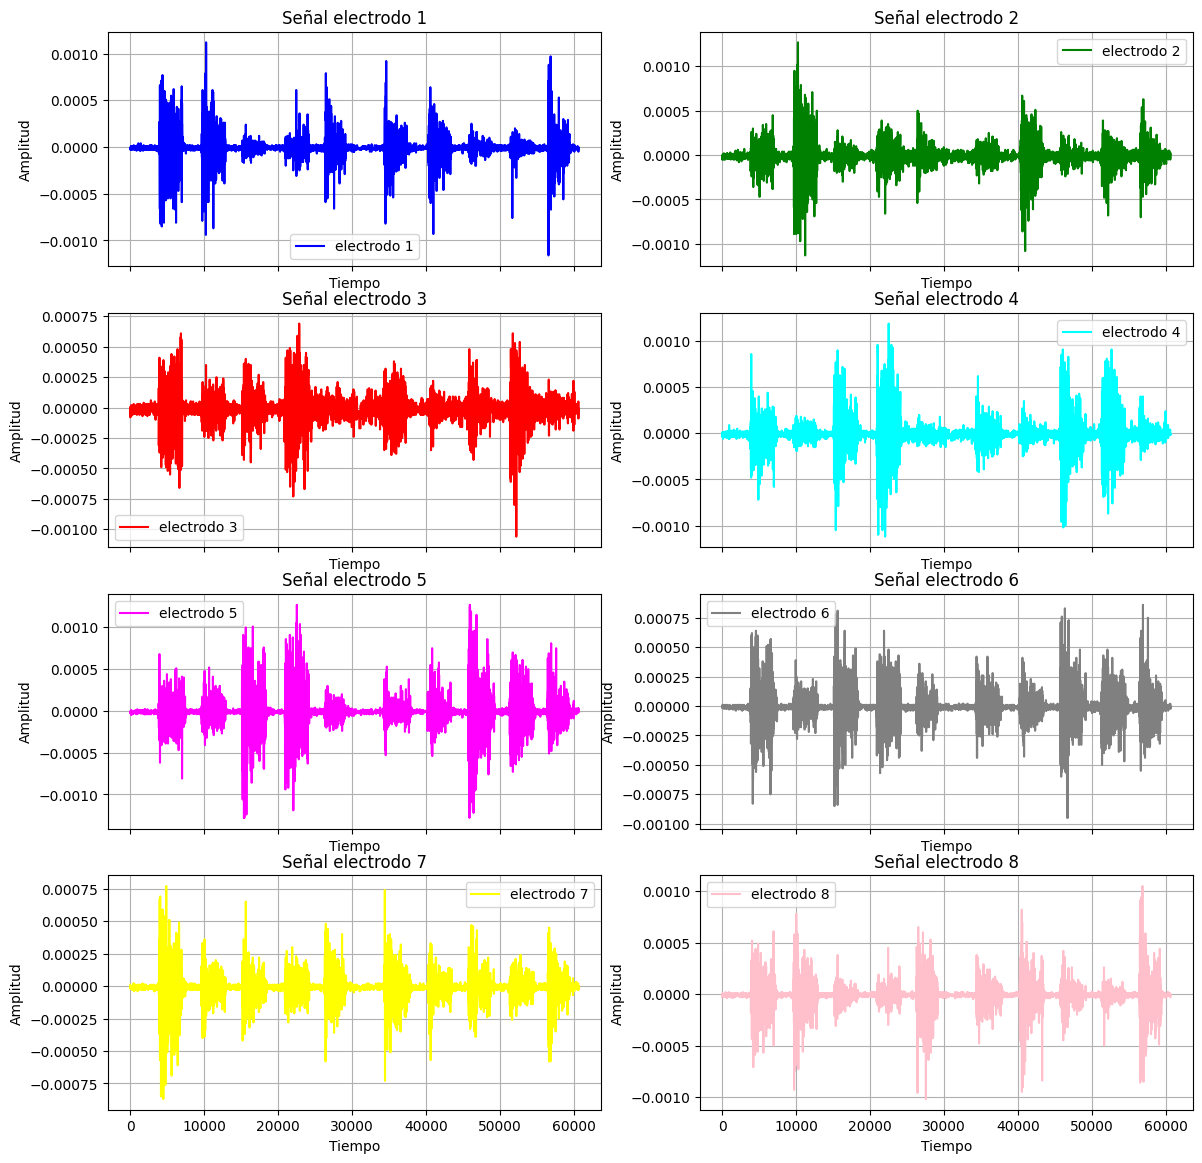

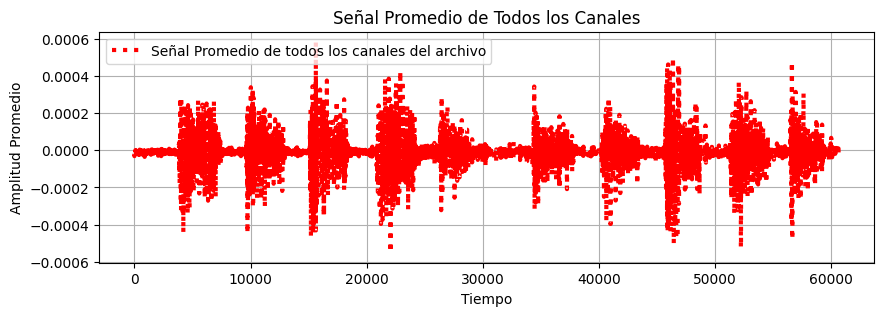

In [33]:
analisis2 = AnalisisEMG()
analisis2.cargar_datos('archivo2.mat')
analisis2.mostrar_informacion()
analisis2.graficar_par()
analisis2.maxima_amplitud()
analisis2.promedio_canales()

2. (20%) Utilice la librería NumPy para generar una serie de señales sinusoidales con las siguientes características:

- **Frecuencia de la señal: 1 Hz.**
- **Número de muestras: 1000.**
- **Rango de amplitud: entre 1 y 5 unidades.**

Genere un total de 5 señales sinusoidales, cada una con una amplitud aleatoria dentro del rango especificado.

Utilice la librería Matplotlib para graficar las 5 señales sinusoidales en una misma figura y cada señal debe estar etiquetada con su respectiva amplitud en la leyenda.

Incluya etiquetas adecuadas en los ejes x e y de la figura, así como un título descriptivo.

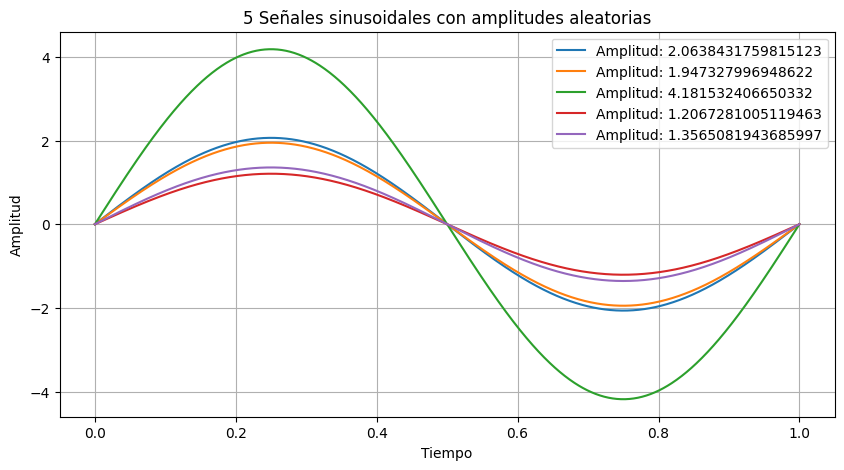

In [49]:
#SOLUCION PUNTO 2

#f(t)=A⋅sin(2π⋅f⋅t) Funcion a utilizar para el calculo

Frecuencia=1 
Cantidad_muestras= 1000
Rango_amplitud=(1,5)
Cantidad_señales=5


amp= np.random.uniform(Rango_amplitud[0], Rango_amplitud[1],Cantidad_señales)
tiempo= np.linspace(0,1, Cantidad_muestras)

plt.figure(figsize=(10, 5))
for i in amp:
    señal = i * np.sin(2 * np.pi * Frecuencia * tiempo)
    plt.plot(tiempo, señal, label=f'Amplitud: {i}')
   
plt.title('5 Señales sinusoidales con amplitudes aleatorias')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

3. (30%) Cargue el conjunto de datos de dispositivos médicos desde el archivo CSV 'datos_dispositivos.csv' utilizando la biblioteca Pandas.
Realice un análisis exploratorio de los datos utilizando métodos y funciones de Pandas: 

- Muestre las primeras filas del DataFrame para entender su estructura.
- Verifique la información básica del DataFrame, como el número de filas y columnas, los tipos de datos de cada columna y la presencia de valores nulos.
- Filtre el dataframe según la clasificación de riesgo de los dispositivos y cree un nuevo dataframe para cada uno de ellos.
- Por medio de filtros y métodos de pandas identifique los diferentes fabricantes de los dispositivos de la bases de datos y cuantos dispositivos corresponden a cada uno de los fabricantes.

In [37]:
#PUNTO 3 

import os
import glob
current = os.getcwd()
file = glob.glob(current+'/*.csv')

archivo =pd.read_csv(r"datos_dispositivos.csv", sep=',')
                     

In [39]:
print(f"Las primeras filas del Dataframe son:")
archivo.head()

Las primeras filas del Dataframe son:


,ID,Nombre_dispositivo,Fabricante,Clasificacion_riesgo
0,1,Monitor de signos vitales,MedTech,Bajo
1,2,Desfibrilador,LifeCare,Moderado
2,3,Electrocardiograma,CardioTech,Alto
3,4,Respirador,RespiraCorp,Bajo
4,5,Bomba de infusión,InfuseCo,Moderado


In [40]:
print(f"Numero de filas: {archivo.shape[0]}")
print(f"Numero de columnas: {archivo.shape[1]}")

Numero de filas: 30
Numero de columnas: 4


In [41]:
print("Los  datos de las columnas del Dataframe:")
archivo.dtypes

Los  datos de las columnas del Dataframe:


ID                       int64
Nombre_dispositivo      object
Fabricante              object
Clasificacion_riesgo    object
dtype: object

In [42]:
if archivo.isnull().values.any():
    print("El DataFrame contiene valores nulos.")
else:
    print ('El dataframe no tiene valores nulos')

El dataframe no tiene valores nulos


In [43]:
archivo.columns

Index(['ID', 'Nombre_dispositivo', 'Fabricante', 'Clasificacion_riesgo'], dtype='object')

In [44]:
#FILTRAR PARA CLASIFICACION DE RIESGO
# Obtener todas las clasificasiones de riesgo
clasificacion_bajo = archivo['Clasificacion_riesgo'] == 'Bajo'
clasificacion_moderado = archivo['Clasificacion_riesgo'] == 'Moderado'
clasificacion_alto = archivo['Clasificacion_riesgo'] == 'Alto'

In [45]:
#CREACION DE LOS NUEVOS DATAFRAME 
dataFrame_bajo = archivo[clasificacion_bajo]
print(dataFrame_bajo)
print('')
dataFrame_moderado = archivo[clasificacion_moderado] 
print(dataFrame_moderado)
print('')
dataFrame_alto = archivo[clasificacion_alto] 
print(dataFrame_alto)

    ID                  Nombre_dispositivo   Fabricante Clasificacion_riesgo
0    1           Monitor de signos vitales      MedTech                 Bajo
3    4                          Respirador  RespiraCorp                 Bajo
7    8           Monitor de ritmo cardíaco   CardioTech                 Bajo
8    9  Monitor de signos vitales neonatal      MedTech                 Bajo
9   10          Monitor de gases en sangre  RespiraCorp                 Bajo
10  11        Bomba de infusión de morfina      MedTech                 Bajo
11  12      Electrocardiógrafo ambulatorio     InfuseCo                 Bajo
16  17            Desfibrilador pediátrico     LifeCare                 Bajo
17  18            Desfibrilador pediátrico      MedTech                 Bajo
21  22                Desfibrilador manual      MedTech                 Bajo
23  24   Bomba de infusión de medicamentos      MedTech                 Bajo
24  25                   Bomba de insulina     LifeCare                 Bajo

In [48]:
#Numero de dispositivos por fabricante

cuenta_fabricantes = archivo['Fabricante'].value_counts()

print(cuenta_fabricantes)


Fabricante
MedTech        9
CardioTech     9
LifeCare       7
RespiraCorp    3
InfuseCo       2
Name: count, dtype: int64


**Éxitos y recuerden que la entrega del parcial se realiza subiendo este notebook a su repositorio de github.**